In [96]:
#simulation of AR(2) model from the Ding paper

In [97]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
import sklearn

In [98]:
seed(1)
l = 50000
series = [gauss(0.0, 1.0) for i in range(l)]
eSeriesX = Series(series)

seed(3)
series = [gauss(0.0, 1.0) for i in range(l)]
eSeriesXtest = Series(series)

In [99]:
seed(2)
series = [gauss(0.0, 1.0) for i in range(l)]
eSeriesY = Series(series)

In [100]:
#check that noise is white, we want mean = 0
#print(seriesX.describe())
#print(seriesY.describe())

In [101]:
X = np.zeros((l,1))
Y = np.zeros((l,1))
for i in range(l):
    X[i] = .9*X[i-1] - .5*X[i-2] + eSeriesX[i]
    Y[i] = .8*Y[i-1] - .5*Y[i-2] + .16*X[i-1] - .2*X[i-2] + eSeriesY[i]
    

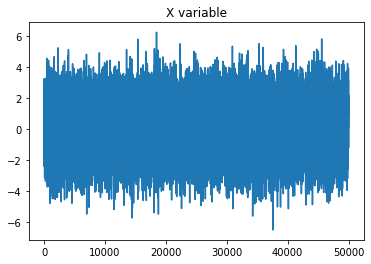

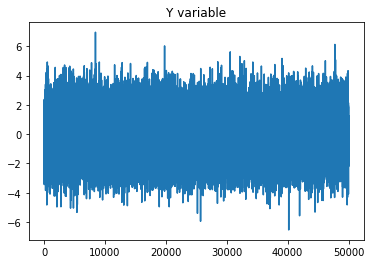

In [102]:
plt.title("X variable")
plt.plot(X)
plt.show()

plt.title("Y variable")
plt.plot(Y)
plt.show()

In [103]:
############# Let's try to solve the X series with a memory of p = 8 ##############

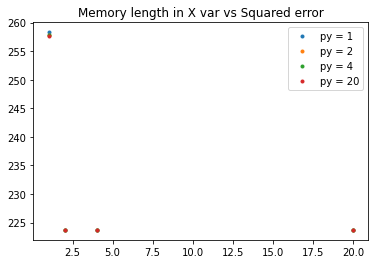

In [104]:
c = np.ones((l,1))

memVec = [1, 2, 4, 20]
error = np.zeros((len(memVec),2,len(memVec)))

#this loop allows p to be different for each different combination of channels
#when solving with 5 memory steps, we solve 5^#number of channels least squares problems
for px in memVec: #number of memory points to look to minus 1
    for py in memVec:

        memMat = c
        hold = X

        for i in range(px):
            hold = np.roll(hold,1)
            hold[0] = 0
            memMat = np.hstack((memMat,hold))
        hold = Y
        for i in range(py):
            hold = np.roll(hold,1)
            hold[0] = 0
            memMat = np.hstack((memMat,hold))
        ols = Ridge(alpha=0)
        ols.fit(memMat,X)
        pred = ols.predict(memMat)
        error[memVec.index(px), 0, memVec.index(py)] = px
        error[memVec.index(px), 1, memVec.index(py)] = np.linalg.norm((X-pred))

plt.title("Memory length in X var vs Squared error") #### can update the code below with this type of loop
for i in range(len(memVec)):
    plt.plot(error[:, 0, i], error[:,1, i], ".", label = f"py = {memVec[i]}")
plt.legend()
plt.show()

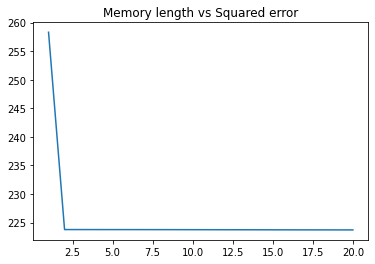

In [105]:
count = 0
memVec = [1, 2, 4, 8, 12, 16, 20]
error = np.zeros((len(memVec),2))

for px in memVec: #number of memory points to look to minus 1
    #print(str(px), "memory points")
    py = px
    memMat = c
    hold = X
    error[count,0] = px
    for i in range(px):
        hold = np.roll(hold,1)
        hold[0] = 0
        memMat = np.hstack((memMat,hold))
    hold = Y
    for i in range(py):
        hold = np.roll(hold,1)
        hold[0] = 0
        memMat = np.hstack((memMat,hold))
    ols = Ridge(alpha=0)
    ols.fit(memMat,X)
    #print(ols.coef_)
    pred = ols.predict(memMat)
    error[count,1] = np.linalg.norm((X-pred))
    count = count + 1

plt.title("Memory length vs Squared error")
plt.plot(error[:,0],error[:,1])
plt.show()

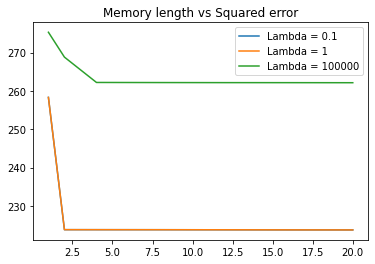

In [106]:

memVec = [1, 2, 4, 8, 12, 16, 20]
ridgeVec = [.1, 1, 100000] #this needs a huge alpha to actually affect performance
error = np.zeros((len(memVec),2,len(ridgeVec)))


for L in ridgeVec:
    count = 0
    for px in memVec: #number of memory points to look to minus 1
        #print(str(px), "memory points")
        py = px
        memMat = c
        hold = X
        error[count,0] = px
        for i in range(px):
            hold = np.roll(hold,1)
            hold[0] = 0
            memMat = np.hstack((memMat,hold))
        hold = Y
        for i in range(py):
            hold = np.roll(hold,1)
            hold[0] = 0
            memMat = np.hstack((memMat,hold))
        ols = Ridge(alpha=L)
        ols.fit(memMat,X)
        #print(ols.coef_)
        pred = ols.predict(memMat)
        error[count,1,ridgeVec.index(L)] = np.linalg.norm((X-pred))
        count = count + 1

string0 = f"Lambda = {ridgeVec[0]}"
string1 = f"Lambda = {ridgeVec[1]}"
string2 = f"Lambda = {ridgeVec[2]}"
plt.title("Memory length vs Squared error") #### Maybe try doing this as a for loop?
plt.plot(error[:, 0, 0], error[:,1, 0], label = string0)
plt.plot(error[:, 0, 1], error[:,1, 1], label = string1)
plt.plot(error[:, 0, 2], error[:,1, 2], label = string2)
plt.legend()
plt.show()

In [107]:
memVec = [1, 2, 4, 8, 12, 16, 20]
ridgeVec = [.1, 1, 100000] #this needs a huge alpha to actually affect performance
error = np.zeros((len(memVec),2,len(ridgeVec)))


for L in ridgeVec:
    count = 0
    for px in memVec: #number of memory points to look to minus 1
        #print(str(px), "memory points")
        py = px
        memMat = c
        hold = X
        error[count,0] = px
        for i in range(px):
            hold = np.roll(hold,1)
            hold[0] = 0
            memMat = np.hstack((memMat,hold))
        hold = Y
        for i in range(py):
            hold = np.roll(hold,1)
            hold[0] = 0
            memMat = np.hstack((memMat,hold))
        ols = Ridge(alpha=L)
        ols.fit(memMat,X)
        #print(ols.coef_)
        pred = ols.predict(memMat)
        error[count,1,ridgeVec.index(L)] = np.linalg.norm((X-pred))
        count = count + 1

In [112]:
cv = sklearn.model_selection.KFold(n_splits=10)